In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, KFold

In [2]:
raw = pd.read_csv('clean_data.csv')

In [3]:
df = raw[:]
df.drop(columns=['Unnamed: 0'], inplace=True)
df['label'].replace('clean', int(0), inplace=True)     ### Clean == 0
df['label'].replace('noisy', int(1), inplace=True)     ### Noisy == 1

/Users/appy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/appy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [4]:
y = df['label']
X = df.drop(columns=['label'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1318, 26)
(330, 26)
(1318,)
(330,)


In [7]:
# kf = KFold(n_splits=4, random_state=None, shuffle=False)

# Logistic Regression and Random Forest

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, f1_score, auc, log_loss

In [9]:
'''

Fitting Logistic Regression Model

'''

# for i in [0.01, 0.05, 0.25, 0.5, 1]:
lr = LogisticRegression(C=0.1)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_probs = lr.predict_proba(X_test)

print("Accuracy: ", accuracy_score(y_test, lr_pred))
print("Confusion Matrix: ",(confusion_matrix(y_test, lr_pred)))
print("Report: ",(classification_report(y_test, lr_pred)))

Accuracy:  0.9545454545454546
Confusion Matrix:  [[151  12]
 [  3 164]]
Report:                precision    recall  f1-score   support

           0       0.98      0.93      0.95       163
           1       0.93      0.98      0.96       167

    accuracy                           0.95       330
   macro avg       0.96      0.95      0.95       330
weighted avg       0.96      0.95      0.95       330



/Users/appy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
'''

Intercept and B-coefficients 

'''

cols = X.columns
coefs = lr.coef_
data_ = {'coef': cols, 'value': coefs[0]}
df_coef = pd.DataFrame(data_)

print(lr.intercept_)
print(lr.coef_)
df_coef

[-0.0051743]
[[ 0.01412884 -0.01028338  0.00431829  0.00384471 -0.00293511 -0.00960775
   0.07813812  0.11522015  0.20398734  0.10136235 -0.11159499  0.14836316
   0.07274325 -0.12187851  0.29535361  0.00829116  0.41293717  0.00210909
   0.06081498  0.17317422 -0.24902802  0.54473662 -0.62044083  0.50664795
  -0.2066151   0.24898991]]


,coef,value
0,chroma_stft,0.014129
1,rmse,-0.010283
2,spectral_centroid,0.004318
3,spectral_bandwidth,0.003845
4,rolloff,-0.002935
5,zero_crossing_rate,-0.009608
6,mfcc1,0.078138
7,mfcc2,0.115220
8,mfcc3,0.203987
9,mfcc4,0.101362


In [11]:
'''

Calculate Log-Loss

'''

print(log_loss(y_test, lr_probs, normalize=False))
print(log_loss(y_test, lr_probs))

32.88372584529098
0.09964765407663934


In [12]:
'''

Fitting Random Forest Classifier

'''

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, rf_pred))

/Users/appy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:  0.9424242424242424


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.996
Random Forest: ROC AUC=0.988


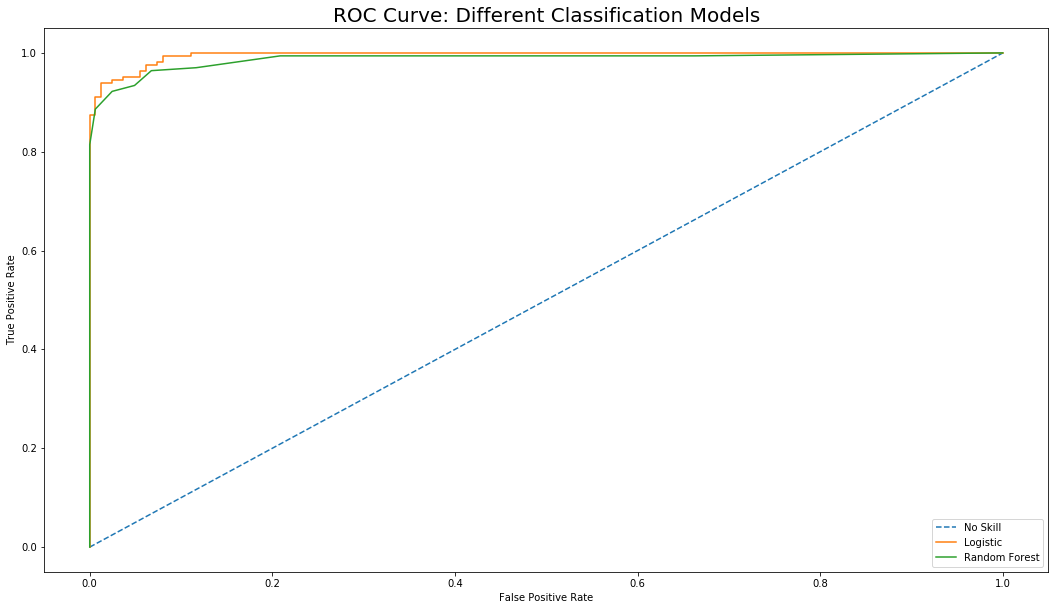

In [13]:
'''

Plot ROC curve after fitting a model

'''

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# Predict Probabilities
lr_probs = lr.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# plot the roc curve for the model
f1,ax1 = plt.subplots(figsize =(18,10))
ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(lr_fpr, lr_tpr, label='Logistic')
ax1.plot(rf_fpr, rf_tpr, label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.title('ROC Curve: Different Classification Models', fontsize=20)
# plt.savefig('ROC_classification_models.png')
plt.show();

Logistic: f1=0.956 auc=0.996
Random Forest: f1=0.943 auc=0.991


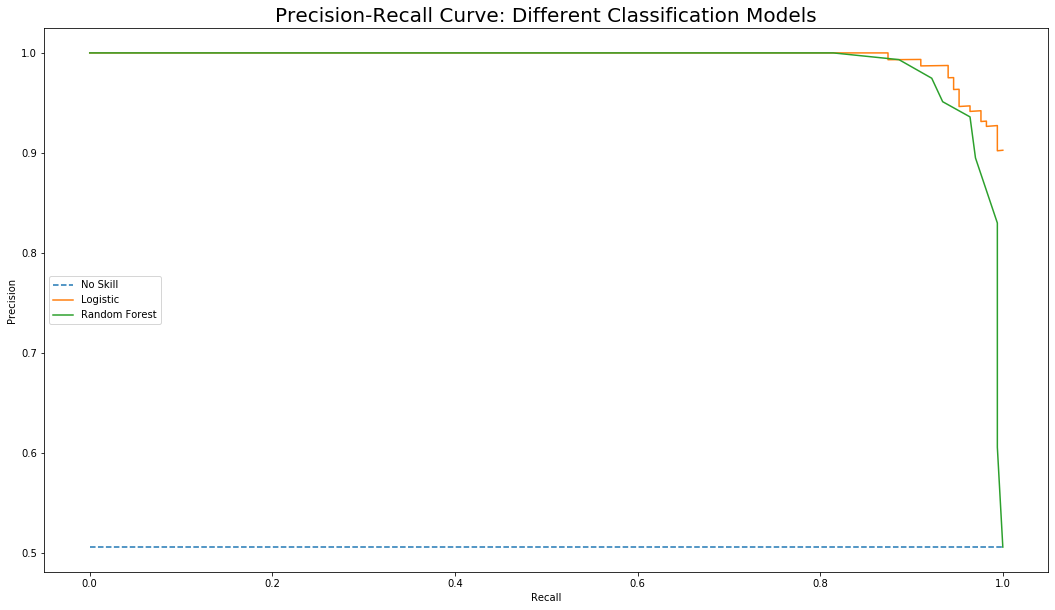

In [14]:
'''

Plot Precision-Recall curve after fitting a model

'''

# predict class values

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, lr_pred), auc(lr_recall, lr_precision)

rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test, rf_pred), auc(rf_recall, rf_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('Random Forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)

f2,ax2 = plt.subplots(figsize =(18,10))
ax2.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
ax2.plot(lr_recall, lr_precision, label='Logistic')
ax2.plot(rf_recall, rf_precision, label='Random Forest')


# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()
plt.title('Precision-Recall Curve: Different Classification Models', fontsize=20)
# plt.savefig('precision_recall_classification_models.png')
plt.show();

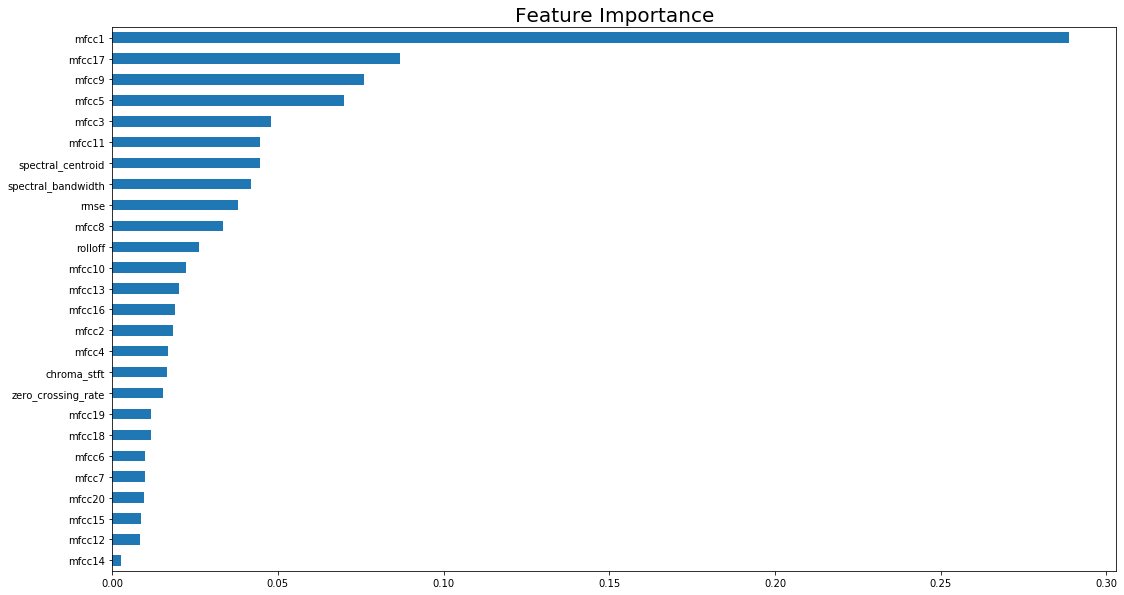

In [15]:
'''

Plot Feature Importance after fitting a random forest

'''

#calculate important features
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)

#plot graph of feature importances
# f3,ax3 = plt.subplots(figsize =(18,10))
# feat_importances.plot(kind='barh')
# plt.show()

feat_importances = feat_importances.sort_values()
f3,ax3 = plt.subplots(figsize =(18,10))
feat_importances.plot(kind='barh')
plt.title('Feature Importance', fontsize=20)
# plt.savefig('feature_importance.png')
plt.show();

# R-square values for different features

In [16]:
from sklearn.metrics import r2_score

'''

R-square using all features

'''

print(accuracy_score(y_test, lr_pred))
print(r2_score(y_test, lr_pred))

0.9545454545454546
0.8181551008412623


In [17]:
'''

Train Logistic Regression using top feature: mfcc1

'''

# Create new df for this task
df_2 = raw[:]
df_2.drop(columns=['Unnamed: 0'], inplace=True)
df_2['label'].replace('clean', int(0), inplace=True)     ### Clean == 0
df_2['label'].replace('noisy', int(1), inplace=True)     ### Noisy == 1


# Select X and y
y_2 = df_2['label']
X_2 = df_2[['mfcc1']]

# Train/Test
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2)

# Train Logistic Regression Model
lr_2 = LogisticRegression(C=0.1)
lr_2.fit(X_2_train, y_2_train)
lr_2_pred = lr_2.predict(X_2_test)
lr_2_probs = lr_2.predict_proba(X_2_test)

'''

Accuracy and R-square using top feature: mfcc1

'''

print(accuracy_score(y_2_test, lr_2_pred))
print(r2_score(y_2_test, lr_2_pred))

0.8787878787878788
0.5137046861184792


/Users/appy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/appy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/appy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
'''

Train Logistic Regression excluding top feature: mfcc1

'''

# Create new df for this task
df_3 = raw[:]
df_3.drop(columns=['Unnamed: 0'], inplace=True)
df_3['label'].replace('clean', int(0), inplace=True)     ### Clean == 0
df_3['label'].replace('noisy', int(1), inplace=True)     ### Noisy == 1


# Select X and y
y_3 = df_3['label']
X_3 = df_3.drop(columns=['mfcc1', 'label'])

# Train/Test
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.2)

# Train Logistic Regression Model
lr_3 = LogisticRegression(C=0.1)
lr_3.fit(X_3_train, y_3_train)
lr_3_pred = lr_3.predict(X_3_test)
lr_3_probs = lr_3.predict_proba(X_3_test)

'''

Accuracy and R-square excluding top feature: mfcc1

'''

print(accuracy_score(y_3_test, lr_3_pred))
print(r2_score(y_3_test, lr_3_pred))

0.9666666666666667
0.866647073950259


/Users/appy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/appy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/appy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
'''

mfcc1

Accuracy: 0.81 to 0.88
R^2: 0.27 to 0.55


All others

Accuracy: 0.94 to 0.97
R^2: 0.79 to 0.90

'''

'\n\nmfcc1\n\nAccuracy: 0.81 to 0.88\nR^2: 0.27 to 0.55\n\n\nAll others\n\nAccuracy: 0.94 to 0.97\nR^2: 0.79 to 0.90\n\n'

No Skill: ROC AUC=0.500
Logistic[all features]: ROC AUC=0.996
Logistic[only mfcc1]: ROC AUC=0.950
Logistic[except mfcc1]: ROC AUC=0.991


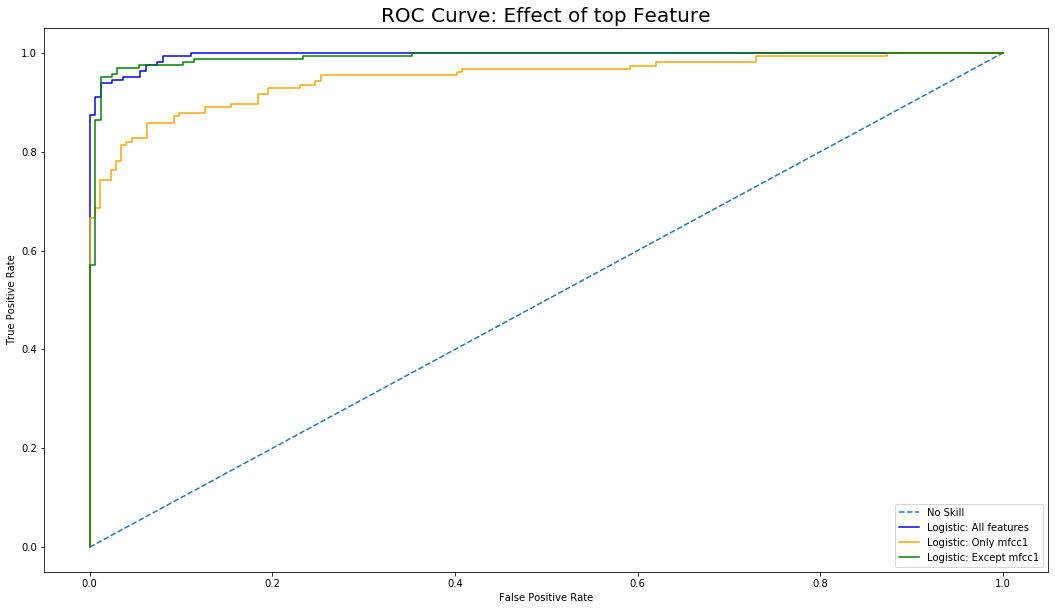

In [20]:
'''

Plot ROC curve after fitting a model

'''

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# Predict Probabilities
lr_probs = lr.predict_proba(X_test)
lr_2_probs = lr_2.predict_proba(X_2_test)
lr_3_probs = lr_3.predict_proba(X_3_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_2_probs = lr_2_probs[:, 1]
lr_3_probs = lr_3_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
lr_2_auc = roc_auc_score(y_2_test, lr_2_probs)
lr_3_auc = roc_auc_score(y_3_test, lr_3_probs)


# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic[all features]: ROC AUC=%.3f' % (lr_auc))
print('Logistic[only mfcc1]: ROC AUC=%.3f' % (lr_2_auc))
print('Logistic[except mfcc1]: ROC AUC=%.3f' % (lr_3_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_2_fpr, lr_2_tpr, _ = roc_curve(y_2_test, lr_2_probs)
lr_3_fpr, lr_3_tpr, _ = roc_curve(y_3_test, lr_3_probs)

# plot the roc curve for the model
f4,ax4 = plt.subplots(figsize =(18,10))
ax4.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax4.plot(lr_fpr, lr_tpr, label='Logistic: All features', color='blue')
ax4.plot(lr_2_fpr, lr_2_tpr, label='Logistic: Only mfcc1', color='orange')
ax4.plot(lr_3_fpr, lr_3_tpr, label='Logistic: Except mfcc1', color='green')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.title('ROC Curve: Effect of top Feature', fontsize=20)

# plt.savefig('ROC_mfcc_.png')
plt.show();

Logistic[all features]: f1=0.956 auc=0.996
Logistic[only mfcc1]: f1=0.858 auc=0.958
Logistic[except mfcc1]: f1=0.966 auc=0.991


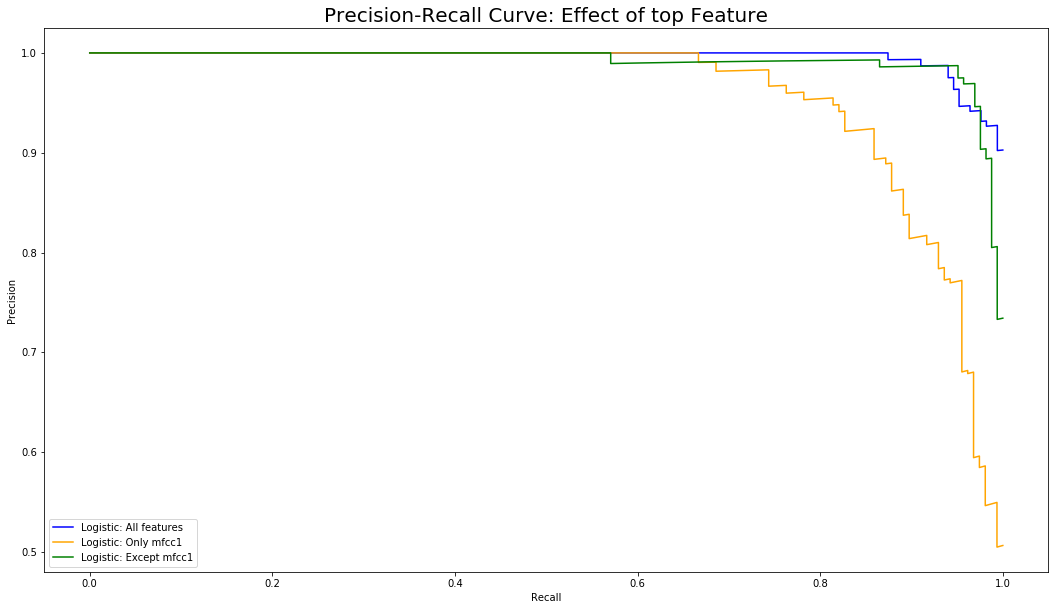

In [21]:
'''

Plot Precision-Recall curve after fitting a model

'''

# predict class values

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, lr_pred), auc(lr_recall, lr_precision)

lr_2_precision, lr_2_recall, _ = precision_recall_curve(y_2_test, lr_2_probs)
lr_2_f1, lr_2_auc = f1_score(y_2_test, lr_2_pred), auc(lr_2_recall, lr_2_precision)

lr_3_precision, lr_3_recall, _ = precision_recall_curve(y_3_test, lr_3_probs)
lr_3_f1, lr_3_auc = f1_score(y_3_test, lr_3_pred), auc(lr_3_recall, lr_3_precision)

# summarize scores
print('Logistic[all features]: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('Logistic[only mfcc1]: f1=%.3f auc=%.3f' % (lr_2_f1, lr_2_auc))
print('Logistic[except mfcc1]: f1=%.3f auc=%.3f' % (lr_3_f1, lr_3_auc))


# plot the precision-recall curves
#no_skill = len(y_test[y_test==1]) / len(y_test)

f5,ax5 = plt.subplots(figsize =(18,10))
#ax5.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
ax5.plot(lr_recall, lr_precision, label='Logistic: All features', color='blue')
ax5.plot(lr_2_recall, lr_2_precision, label='Logistic: Only mfcc1', color='orange')
ax5.plot(lr_3_recall, lr_3_precision, label='Logistic: Except mfcc1', color='green')


# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()
plt.title('Precision-Recall Curve: Effect of top Feature', fontsize=20)

# plt.savefig('precision_recall_mfcc_.png')
plt.show();

# Top Features Comparison

In [22]:
'''

Train Logistic Regression models using top 7 features: mfcc1

'''

# Create new df for this task
df_4 = raw[:]
df_4.drop(columns=['Unnamed: 0'], inplace=True)
df_4['label'].replace('clean', int(0), inplace=True)     ### Clean == 0
df_4['label'].replace('noisy', int(1), inplace=True)     ### Noisy == 1


# Select X and y for different features
y_11 = df_4['label']
X_11 = df_4[['mfcc17']]
y_12 = df_4['label']
X_12 = df_4[['mfcc11']]
y_13 = df_4['label']
X_13 = df_4[['mfcc9']]
y_14 = df_4['label']
X_14 = df_4[['mfcc5']]
y_15 = df_4['label']
X_15 = df_4[['spectral_centroid']]
y_16 = df_4['label']
X_16 = df_4[['rmse']]

# Train/Test
X_11_train, X_11_test, y_11_train, y_11_test = train_test_split(X_11, y_11, test_size=0.2)
X_12_train, X_12_test, y_12_train, y_12_test = train_test_split(X_12, y_12, test_size=0.2)
X_13_train, X_13_test, y_13_train, y_13_test = train_test_split(X_13, y_13, test_size=0.2)
X_14_train, X_14_test, y_14_train, y_14_test = train_test_split(X_14, y_14, test_size=0.2)
X_15_train, X_15_test, y_15_train, y_15_test = train_test_split(X_15, y_15, test_size=0.2)
X_16_train, X_16_test, y_16_train, y_16_test = train_test_split(X_16, y_16, test_size=0.2)


# Train Logistic Regression Model
lr_11 = LogisticRegression(C=0.1)
lr_11.fit(X_11_train, y_11_train)
lr_11_pred = lr_11.predict(X_11_test)
lr_11_probs = lr_11.predict_proba(X_11_test)

lr_12 = LogisticRegression(C=0.1)
lr_12.fit(X_12_train, y_12_train)
lr_12_pred = lr_12.predict(X_12_test)
lr_12_probs = lr_12.predict_proba(X_12_test)

lr_13 = LogisticRegression(C=0.1)
lr_13.fit(X_13_train, y_13_train)
lr_13_pred = lr_13.predict(X_13_test)
lr_13_probs = lr_13.predict_proba(X_13_test)

lr_14 = LogisticRegression(C=0.1)
lr_14.fit(X_14_train, y_14_train)
lr_14_pred = lr_14.predict(X_14_test)
lr_14_probs = lr_14.predict_proba(X_14_test)

lr_15 = LogisticRegression(C=0.1)
lr_15.fit(X_15_train, y_15_train)
lr_15_pred = lr_15.predict(X_15_test)
lr_15_probs = lr_15.predict_proba(X_15_test)

lr_16 = LogisticRegression(C=0.1)
lr_16.fit(X_16_train, y_16_train)
lr_16_pred = lr_16.predict(X_16_test)
lr_16_probs = lr_16.predict_proba(X_16_test)

/Users/appy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/appy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/appy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: De

No Skill: ROC AUC=0.500
Logistic[all features]: ROC AUC=0.996
Logistic[mfcc1]: ROC AUC=0.950
Logistic[mfcc17]: ROC AUC=0.748
Logistic[mfcc11]: ROC AUC=0.707
Logistic[mfcc9]: ROC AUC=0.744
Logistic[mfcc5]: ROC AUC=0.746
Logistic[spectral_centroid]: ROC AUC=0.564
Logistic[rmse]: ROC AUC=0.776


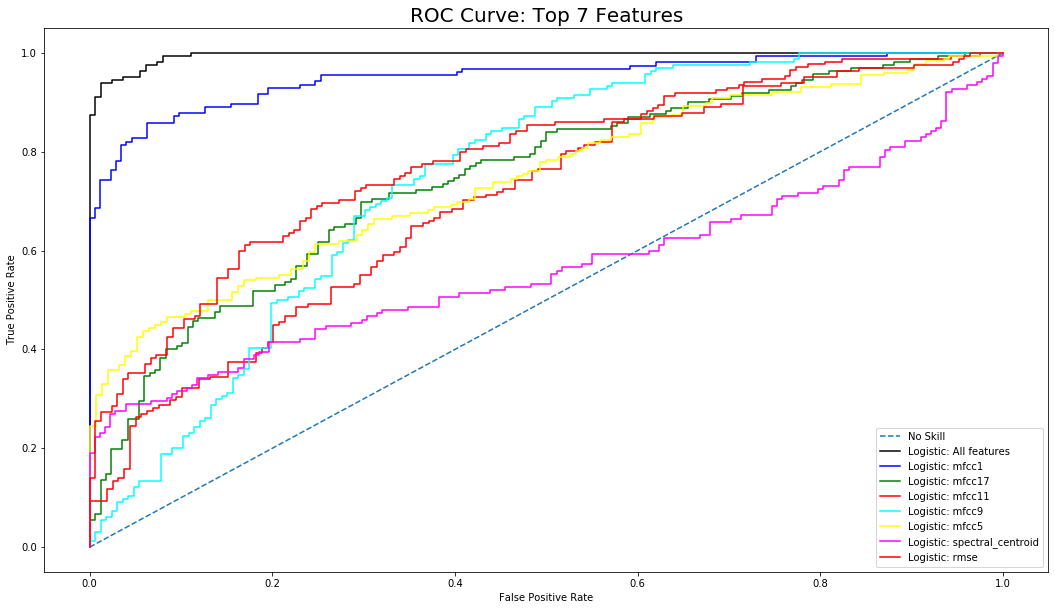

In [23]:
'''

Plot ROC curve after fitting a model

'''

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# Predict Probabilities
lr_probs = lr.predict_proba(X_test)
lr_2_probs = lr_2.predict_proba(X_2_test)
lr_11_probs = lr_11.predict_proba(X_11_test)
lr_12_probs = lr_12.predict_proba(X_12_test)
lr_13_probs = lr_13.predict_proba(X_13_test)
lr_14_probs = lr_14.predict_proba(X_14_test)
lr_15_probs = lr_15.predict_proba(X_15_test)
lr_16_probs = lr_16.predict_proba(X_16_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_2_probs = lr_2_probs[:, 1]
lr_11_probs = lr_11_probs[:, 1]
lr_12_probs = lr_12_probs[:, 1]
lr_13_probs = lr_13_probs[:, 1]
lr_14_probs = lr_14_probs[:, 1]
lr_15_probs = lr_15_probs[:, 1]
lr_16_probs = lr_16_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
lr_2_auc = roc_auc_score(y_2_test, lr_2_probs)
lr_11_auc = roc_auc_score(y_11_test, lr_11_probs)
lr_12_auc = roc_auc_score(y_12_test, lr_12_probs)
lr_13_auc = roc_auc_score(y_13_test, lr_13_probs)
lr_14_auc = roc_auc_score(y_14_test, lr_14_probs)
lr_15_auc = roc_auc_score(y_15_test, lr_15_probs)
lr_16_auc = roc_auc_score(y_16_test, lr_16_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic[all features]: ROC AUC=%.3f' % (lr_auc))
print('Logistic[mfcc1]: ROC AUC=%.3f' % (lr_2_auc))
print('Logistic[mfcc17]: ROC AUC=%.3f' % (lr_11_auc))
print('Logistic[mfcc11]: ROC AUC=%.3f' % (lr_12_auc))
print('Logistic[mfcc9]: ROC AUC=%.3f' % (lr_13_auc))
print('Logistic[mfcc5]: ROC AUC=%.3f' % (lr_14_auc))
print('Logistic[spectral_centroid]: ROC AUC=%.3f' % (lr_15_auc))
print('Logistic[rmse]: ROC AUC=%.3f' % (lr_16_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_2_fpr, lr_2_tpr, _ = roc_curve(y_2_test, lr_2_probs)
lr_11_fpr, lr_11_tpr, _ = roc_curve(y_11_test, lr_11_probs)
lr_12_fpr, lr_12_tpr, _ = roc_curve(y_12_test, lr_12_probs)
lr_13_fpr, lr_13_tpr, _ = roc_curve(y_13_test, lr_13_probs)
lr_14_fpr, lr_14_tpr, _ = roc_curve(y_14_test, lr_14_probs)
lr_15_fpr, lr_15_tpr, _ = roc_curve(y_15_test, lr_15_probs)
lr_16_fpr, lr_16_tpr, _ = roc_curve(y_16_test, lr_16_probs)

# plot the roc curve for the model
f6,ax6 = plt.subplots(figsize =(18,10))
ax6.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax6.plot(lr_fpr, lr_tpr, label='Logistic: All features', color='black')
ax6.plot(lr_2_fpr, lr_2_tpr, label='Logistic: mfcc1', color='blue')
ax6.plot(lr_11_fpr, lr_11_tpr, label='Logistic: mfcc17', color='green')
ax6.plot(lr_12_fpr, lr_12_tpr, label='Logistic: mfcc11', color='red')
ax6.plot(lr_13_fpr, lr_13_tpr, label='Logistic: mfcc9', color='cyan')
ax6.plot(lr_14_fpr, lr_14_tpr, label='Logistic: mfcc5', color='yellow')
ax6.plot(lr_15_fpr, lr_15_tpr, label='Logistic: spectral_centroid', color='magenta')
ax6.plot(lr_16_fpr, lr_16_tpr, label='Logistic: rmse', color='red')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.title('ROC Curve: Top 7 Features', fontsize=20)

# plt.savefig('ROC_top_features.png')
plt.show();

Logistic[all features]: f1=0.956 auc=0.996
Logistic[only mfcc1]: f1=0.858 auc=0.958
Logistic[mfcc17]: f1=0.687 auc=0.746
Logistic[mfcc11]: f1=0.649 auc=0.720
Logistic[mfcc9]: f1=0.703 auc=0.679
Logistic[mfcc5]: f1=0.652 auc=0.809
Logistic[spectral_centroid]: f1=0.513 auc=0.643
Logistic[rmse]: f1=0.701 auc=0.799


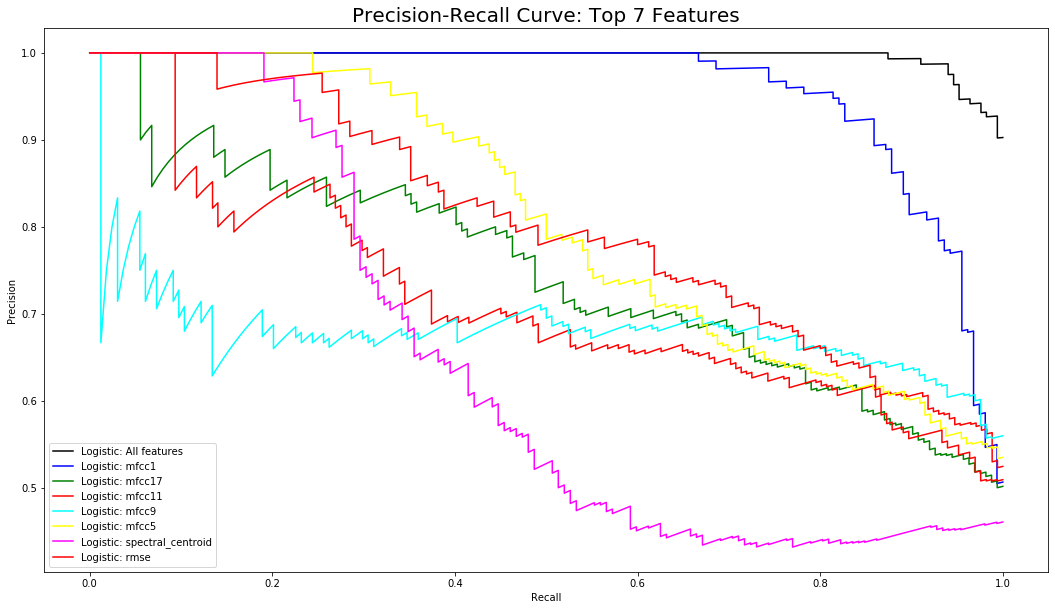

In [25]:
'''

Plot Precision-Recall curve after fitting a model

'''

# predict class values

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, lr_pred), auc(lr_recall, lr_precision)

lr_2_precision, lr_2_recall, _ = precision_recall_curve(y_2_test, lr_2_probs)
lr_2_f1, lr_2_auc = f1_score(y_2_test, lr_2_pred), auc(lr_2_recall, lr_2_precision)

lr_11_precision, lr_11_recall, _ = precision_recall_curve(y_11_test, lr_11_probs)
lr_11_f1, lr_11_auc = f1_score(y_11_test, lr_11_pred), auc(lr_11_recall, lr_11_precision)

lr_12_precision, lr_12_recall, _ = precision_recall_curve(y_12_test, lr_12_probs)
lr_12_f1, lr_12_auc = f1_score(y_12_test, lr_12_pred), auc(lr_12_recall, lr_12_precision)

lr_13_precision, lr_13_recall, _ = precision_recall_curve(y_13_test, lr_13_probs)
lr_13_f1, lr_13_auc = f1_score(y_13_test, lr_13_pred), auc(lr_13_recall, lr_13_precision)

lr_14_precision, lr_14_recall, _ = precision_recall_curve(y_14_test, lr_14_probs)
lr_14_f1, lr_14_auc = f1_score(y_14_test, lr_14_pred), auc(lr_14_recall, lr_14_precision)

lr_15_precision, lr_15_recall, _ = precision_recall_curve(y_15_test, lr_15_probs)
lr_15_f1, lr_15_auc = f1_score(y_15_test, lr_15_pred), auc(lr_15_recall, lr_15_precision)

lr_16_precision, lr_16_recall, _ = precision_recall_curve(y_16_test, lr_16_probs)
lr_16_f1, lr_16_auc = f1_score(y_16_test, lr_16_pred), auc(lr_16_recall, lr_16_precision)

# summarize scores
print('Logistic[all features]: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('Logistic[only mfcc1]: f1=%.3f auc=%.3f' % (lr_2_f1, lr_2_auc))
print('Logistic[mfcc17]: f1=%.3f auc=%.3f' % (lr_11_f1, lr_11_auc))
print('Logistic[mfcc11]: f1=%.3f auc=%.3f' % (lr_12_f1, lr_12_auc))
print('Logistic[mfcc9]: f1=%.3f auc=%.3f' % (lr_13_f1, lr_13_auc))
print('Logistic[mfcc5]: f1=%.3f auc=%.3f' % (lr_14_f1, lr_14_auc))
print('Logistic[spectral_centroid]: f1=%.3f auc=%.3f' % (lr_15_f1, lr_15_auc))
print('Logistic[rmse]: f1=%.3f auc=%.3f' % (lr_16_f1, lr_16_auc))

# plot the precision-recall curves
#no_skill = len(y_test[y_test==1]) / len(y_test)

f7,ax7 = plt.subplots(figsize =(18,10))
#ax7.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
ax7.plot(lr_recall, lr_precision, label='Logistic: All features', color='black')
ax7.plot(lr_2_recall, lr_2_precision, label='Logistic: mfcc1', color='blue')
ax7.plot(lr_11_recall, lr_11_precision, label='Logistic: mfcc17', color='green')
ax7.plot(lr_12_recall, lr_12_precision, label='Logistic: mfcc11', color='red')
ax7.plot(lr_13_recall, lr_13_precision, label='Logistic: mfcc9', color='cyan')
ax7.plot(lr_14_recall, lr_14_precision, label='Logistic: mfcc5', color='yellow')
ax7.plot(lr_15_recall, lr_15_precision, label='Logistic: spectral_centroid', color='magenta')
ax7.plot(lr_16_recall, lr_16_precision, label='Logistic: rmse', color='red')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()
plt.title('Precision-Recall Curve: Top 7 Features', fontsize=20)

plt.savefig('precision_recall_top_features.png')
plt.show();